<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
StkData = pd.read_csv('Data/FB.csv')


### Data Proprocessing

In [3]:
def Dataset(Data, Date):

  Train_Data = Data['Adj Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)

  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)

  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [4]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [5]:
model = Model()

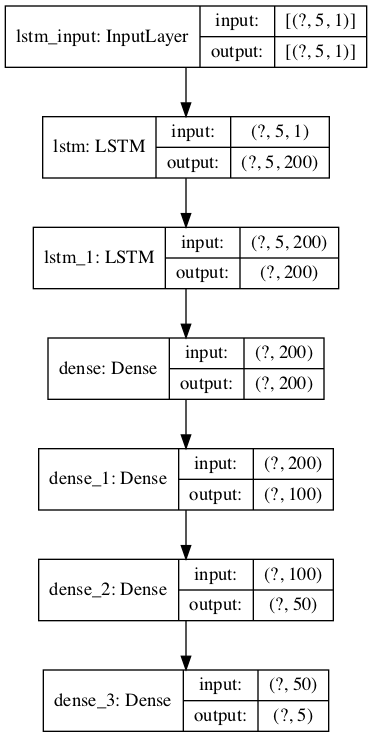

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 200)            161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 200)               40200     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 255       
Total params: 548,005
Trainable params: 548,005
Non-trainable params: 0
__________________________________________________

### Custom Learning Rate

In [8]:
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

In [9]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [10]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [11]:
StkData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
1,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2,2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
3,2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
4,2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


In [12]:
StkData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       428 non-null    object 
 1   Open       428 non-null    float64
 2   High       428 non-null    float64
 3   Low        428 non-null    float64
 4   Close      428 non-null    float64
 5   Adj Close  428 non-null    float64
 6   Volume     428 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 23.5+ KB


In [13]:
# Change Dtype of Date column
StkData["Date"] = pd.to_datetime(StkData["Date"])

###Split the Data into Training and Test set

In [14]:
StkData_Date = '2021-08-20'
StkData_Train_X, StkData_Train_Y, StkData_Test_X, StkData_Test_Y = Dataset(StkData, StkData_Date)

### Model Fitting

In [15]:
StkData_Model = Model()

In [16]:
StkData_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [17]:
StkData_hist = StkData_Model.fit(StkData_Train_X, StkData_Train_Y, epochs = 1000, validation_data = (StkData_Test_X, StkData_Test_Y), callbacks=[callback])

Train on 81 samples, validate on 2 samples
Epoch 1/1000
81/81 [==============================] - 7s 91ms/sample - loss: 71013.0932 - root_mean_squared_error: 266.4828 - val_loss: 140804.6875 - val_root_mean_squared_error: 375.2395
Epoch 2/1000
81/81 [==============================] - 0s 2ms/sample - loss: 71012.9306 - root_mean_squared_error: 266.4825 - val_loss: 140803.3125 - val_root_mean_squared_error: 375.2376
Epoch 3/1000
81/81 [==============================] - 0s 2ms/sample - loss: 71012.1073 - root_mean_squared_error: 266.4810 - val_loss: 140800.5781 - val_root_mean_squared_error: 375.2340
Epoch 4/1000
81/81 [==============================] - 0s 3ms/sample - loss: 71010.7014 - root_mean_squared_error: 266.4783 - val_loss: 140796.4375 - val_root_mean_squared_error: 375.2285
Epoch 5/1000
81/81 [==============================] - 0s 2ms/sample - loss: 7

In [18]:
history_dict = StkData_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()


### Predicting the closing stock price

In [20]:
StkData_prediction = StkData_Model.predict(StkData_Test_X)

In [21]:
plt.figure(figsize=(20, 5))
plt.plot(StkData['Date'][StkData['Date'] < '2021-08-20'], StkData['Adj Close'][StkData['Date'] < '2021-08-20'], label = 'Training')
plt.plot(StkData['Date'][StkData['Date'] >= '2021-08-06'], StkData['Adj Close'][StkData['Date'] >= '2021-08-06'], label = 'Testing')
plt.plot(StkData['Date'][StkData['Date'] >= '2021-08-20'], StkData_prediction.reshape(-1), label = 'Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (16,) and (10,)

In [ ]:
rmse = math.sqrt(mean_squared_error(StkData_Test_Y.reshape(-1, 5), StkData_prediction))
mape = np.mean(np.abs(StkData_prediction - StkData_Test_Y.reshape(-1, 5))/np.abs(StkData_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')